#Exoplanet Detection Part 1


##Transit Photometry


**Transit Photometry Summary**

Transit photometry is a technique used in astronomy to detect and study exoplanets (planets outside our solar system) by observing the periodic dimming of a star’s light when a planet passes in front of it, or “transits.” When a planet transits its host star, it blocks a small portion of the star’s light, causing a temporary decrease in brightness, which can be measured using sensitive instruments. By analyzing these dimming events, astronomers can infer key characteristics of the exoplanet, such as its size, orbital period, and distance from the star

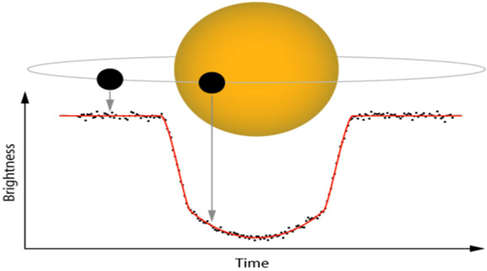

###Transit Dips

Transit dips refer to the temporary decreases in a star’s brightness that occur when an exoplanet passes in front of it from our perspective on Earth. This is known as a “transit” event. During the transit, the planet partially blocks the light emitted by the star, causing the observed brightness to dip or decrease for a short period of time.


#Data

Data from the Kepler Space Telescope. Rows provide data on the flux of a star.

 https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data

In [1]:
#import Data
import gdown
import pandas as pd
import numpy as np
%pylab inline

#original source:https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

raw_data = np.loadtxt('exoTrain.csv', skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis] - 1.
raw_data = np.loadtxt('exoTest.csv', skiprows=1, delimiter=',')
x_test = raw_data[:, 1:]
y_test = raw_data[:, 0, np.newaxis] - 1.
del raw_data

flux_data = pd.read_csv('exoTrain.csv',index_col=0)

def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
        for j in range(remove):
            idx = sorted_values.index[j]
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX-'+str(idx2)]

                count += 1
            new_val /= count # count will always be positive here
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)


    return df

def plot_light_curve(dataset, index):
  plt.figure()
  plt.plot(np.array(dataset[index:index+1])[0])
  plt.show()

Populating the interactive namespace from numpy and matplotlib
exoTrain.csv        100%[===================>] 250.08M  66.5MB/s    in 3.9s    
exoTest.csv         100%[===================>]  27.57M  63.1MB/s    in 0.4s    


In [2]:
flux_data = pd.read_csv('exoTrain.csv', index_col=False)
flux_data.LABEL=flux_data.LABEL-1

flux_data.head(5)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
labels = flux_data.LABEL
flux_data = flux_data.drop('LABEL',axis=1) #drop the labels from the data frame, leaving only the flux data

###Separate Data

In [4]:
non_exo_data=flux_data.loc[labels==0] #select only rows with label 0
exo_data = flux_data.loc[labels==1]

In [5]:
if (len(non_exo_data) > len(exo_data)):
  print('more non-exoplanets')
  print(len(non_exo_data))
  print(len(exo_data))
else:
  print('more exoplanets')
  print(len(non_exo_data))
  print(len(exo_data))

more non-exoplanets
5050
37


###Visualizing Light Curves



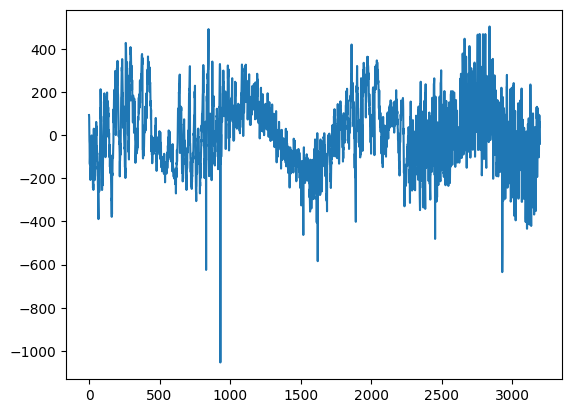

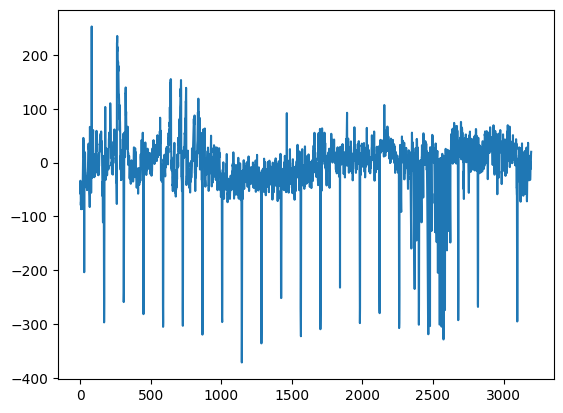

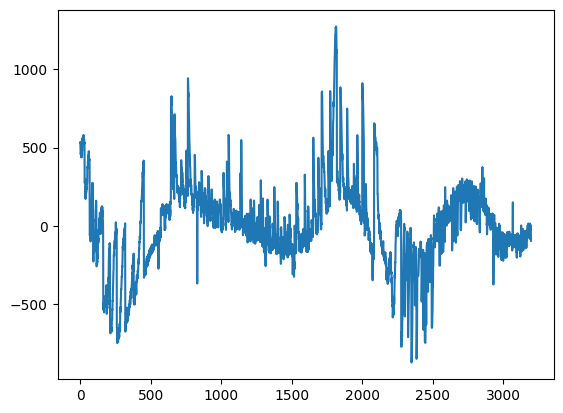

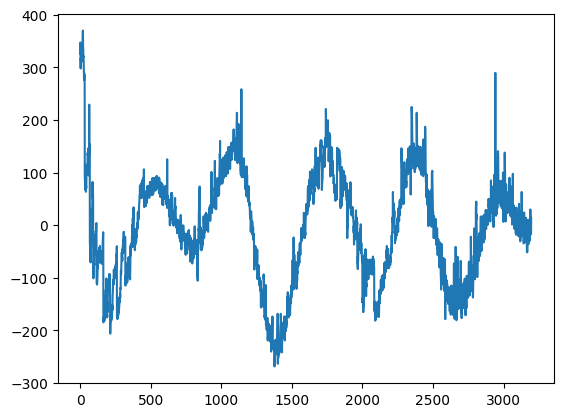

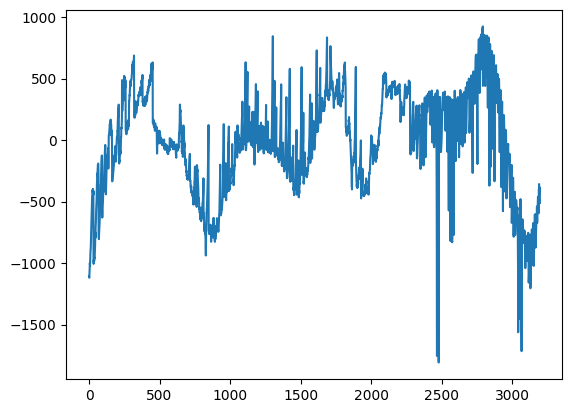

In [6]:
#plot exoplanet light curves
for i in range(5):
  plot_light_curve(exo_data,i)



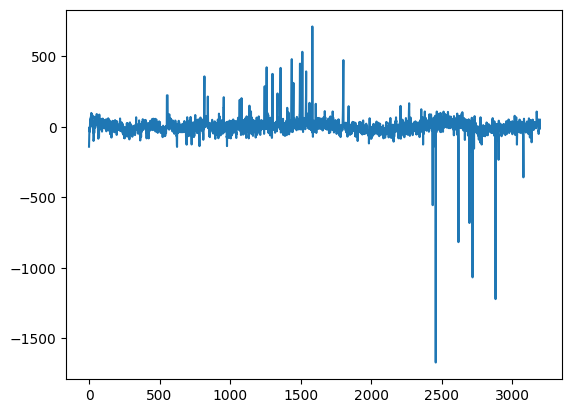

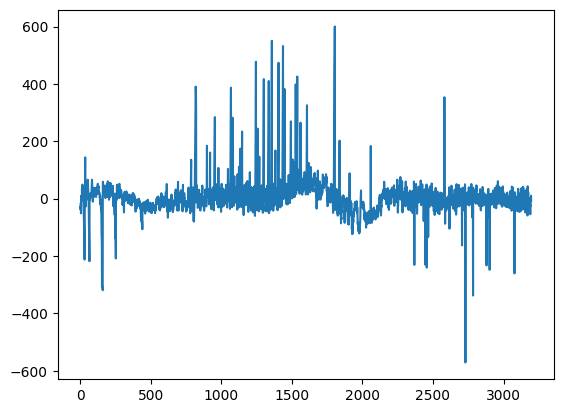

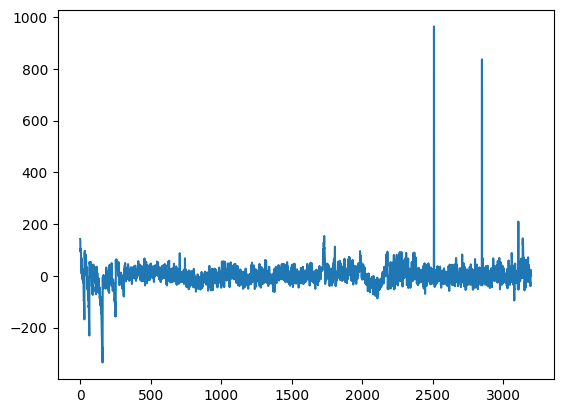

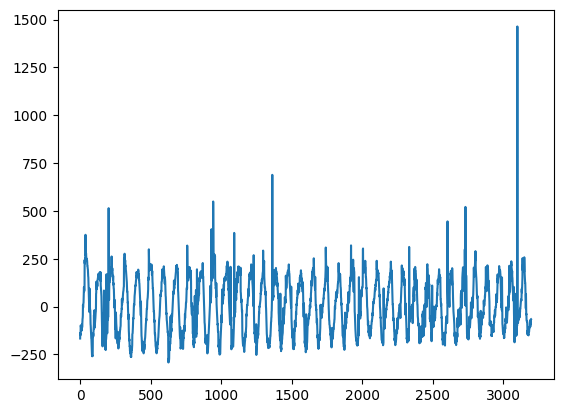

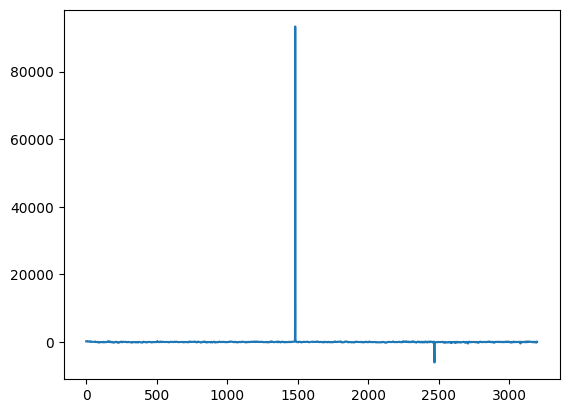

In [7]:
#Plot non exoplanets
for i in range(5):
  plot_light_curve(non_exo_data,i)



##Understanding Data: Exoplanets vs. Non Exoplanets

###Period of Exoplanet

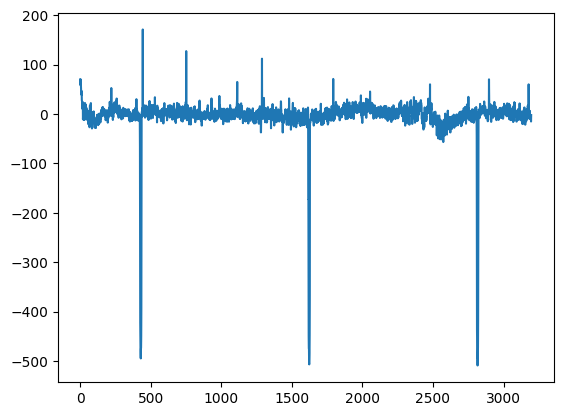

In [ ]:
#See number 12 as an example
plot_light_curve(exo_data,12)







Here, we want to try to visualize one period of the exoplanet transit (starting at a dip and ending at a dip). Let's see if we can find the time t_0, the time at which the first transit (dip in plot) starts. Then, we will see if we can find the period length (time from dip to dip), so we can plot one period from start to finish.



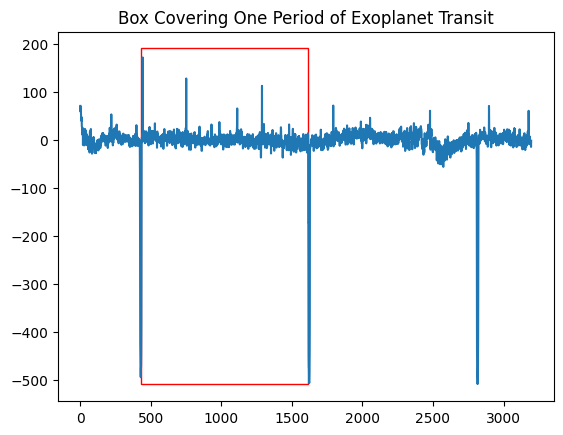

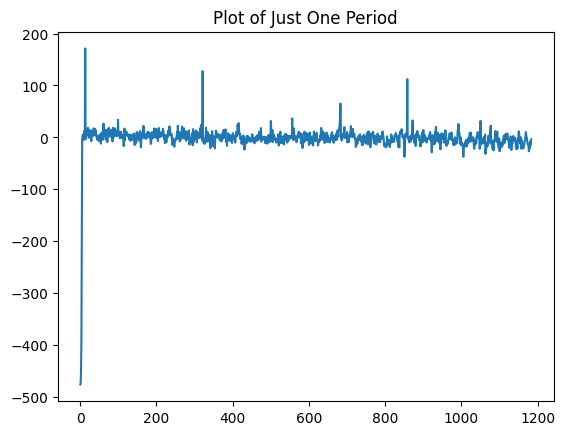

In [9]:
index = 12 #@param {type:"slider", min:0, max:37, step:1}
t_0 = 430 #@param {type:"slider", min:0, max:3197, step:1}
period = 1184 #@param {type:"slider", min:0, max:3197, step:1}

from matplotlib.patches import Rectangle
light_curve=np.array(exo_data.loc[index])
plt.plot(light_curve)
plt.title('Box Covering One Period of Exoplanet Transit')
plt.gca().add_patch(Rectangle((t_0, -510), period, 700, linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

plt.plot(light_curve[t_0: t_0+period])
plt.title('Plot of Just One Period')
plt.show()

###Folding Light Curves

**folding**: Folding means plotting all of the periods on top of each other to see if there is a consistent trend.

*Note:* there is a lot of noise in this data, so each period will not be quite identical.


Below, set the time at which period 1 starts as `start_period_1` and the time at which period 2 starts as `start_period_2`, using your variables `t_0` and `period` from before. Then plot two versions of the curve: starting from the first period and starting from the second period!


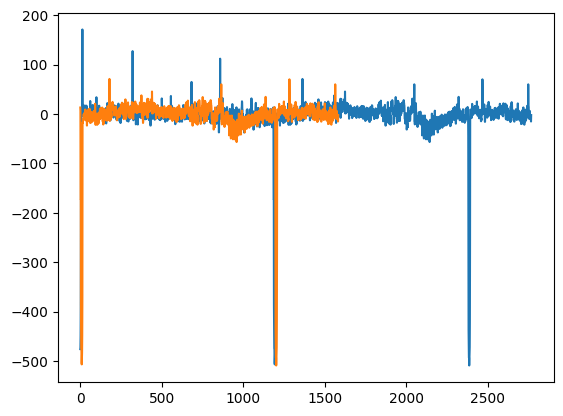

In [10]:
#Plot the curve starting from Period 1
start_period_1= t_0 # time of first transit
plt.plot(light_curve[start_period_1:]) # plots the first curve in blue

#Plot the curve starting from Period 2
start_period_2= t_0 + period # time of first transit
plt.plot(light_curve[start_period_2:]) # plots the first curve in blue

###Folding for a Non-Exoplanet


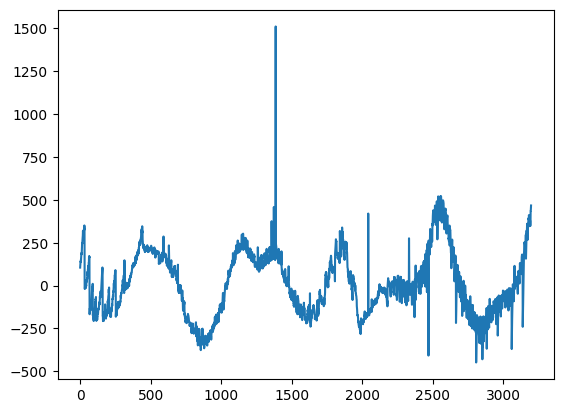

In [12]:

plot_light_curve(non_exo_data,25)



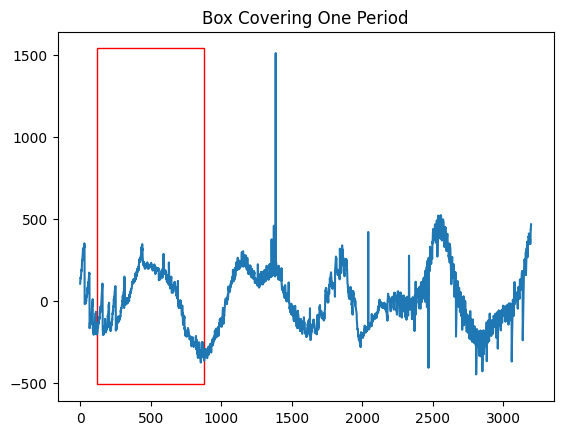

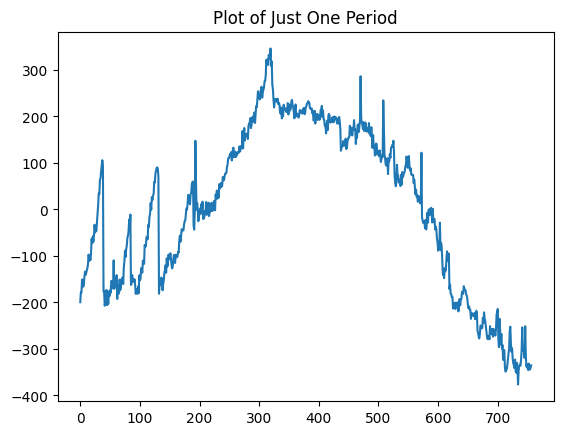

In [13]:
index = 25 #@param {type:"slider", min:0, max:5050, step:1}
t_0 = 121 #@param {type:"slider", min:0, max:3197, step:1}
period = 757 #@param {type:"slider", min:0, max:3197, step:1}

from matplotlib.patches import Rectangle
light_curve=np.array(non_exo_data.iloc[index])
plt.plot(light_curve)
plt.title('Box Covering One Period')
plt.gca().add_patch(Rectangle((t_0, -510), period, 2050, linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

plt.plot(light_curve[t_0: t_0+period])
plt.title('Plot of Just One Period')
plt.show()

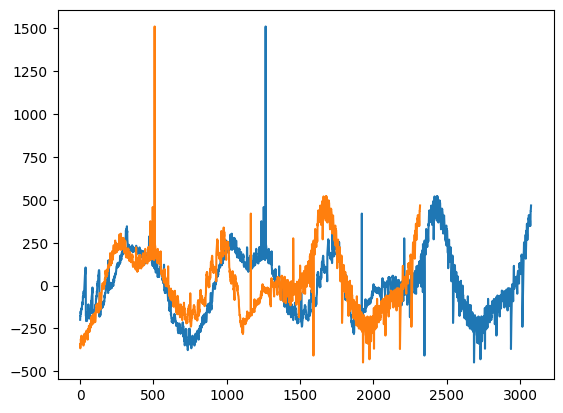

In [14]:
#Plot the curve starting from Period 1
start_period_1= t_0 # time of first transit
plt.plot(light_curve[start_period_1:]) # plots the first curve in blue

#Plot the curve starting from Period 2
start_period_2= t_0 + period # time of first transit
plt.plot(light_curve[start_period_2:]) # plots the first curve in blue